# Explore sentiment and token classification results


## Sentiment Analysis


### Load data

In [13]:
import os
import json
import pathlib

data_folder = "./../../data/processed/sentiment_analysis"
file_paths = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith(".json")]
file_paths.sort()

data = []
for file_path in file_paths:
    with open(file_path, "r") as f:
        data.append(json.load(f))

print(data[0].keys())
print(data[0]['songs'][0].keys())
print(data[0]['songs'][0]['sentiment'].keys())
print(data[0]['songs'][0]['sentiment']['de_gbert'].keys())


dict_keys(['artist', 'songs'])
dict_keys(['title', 'language', 'release_date', 'artist', 'album_name', 'lyrics', 'sentiment'])
dict_keys(['en_distilbert', 'en_roberta', 'de_gbert', 'de_bert'])
dict_keys(['score', 'label'])


### Sentiment Plots


In [32]:
def convert_labels(labels, model_name):
    # de_gbert: Possible labels: 0, 1
    # Could not find the difference between these two, ignoring...
    if model_name == 'de_bert':
        # Possible labels: positive = Positive, negative = Negative, neutral = Neutral
        labels = [label.replace('positive', 'Positive').replace('negative', 'Negative').replace('neutral', 'Neutral') for label in labels]
    elif model_name == 'en_distilbert':
        # Possible labels: POSITIVE = Positive, NEGATIVE = Negative
        labels = [label.replace('POSITIVE', 'Positive').replace('NEGATIVE', 'Negative') for label in labels]
    elif model_name == 'en_roberta':
        # Possible labels: LABEL_0 = Negative, LABEL_1 = Neutral, LABEL_2 = Positive
        labels = [label.replace('LABEL_0', 'Negative').replace('LABEL_1', 'Neutral').replace('LABEL_2', 'Positive') for label in labels]

    return labels

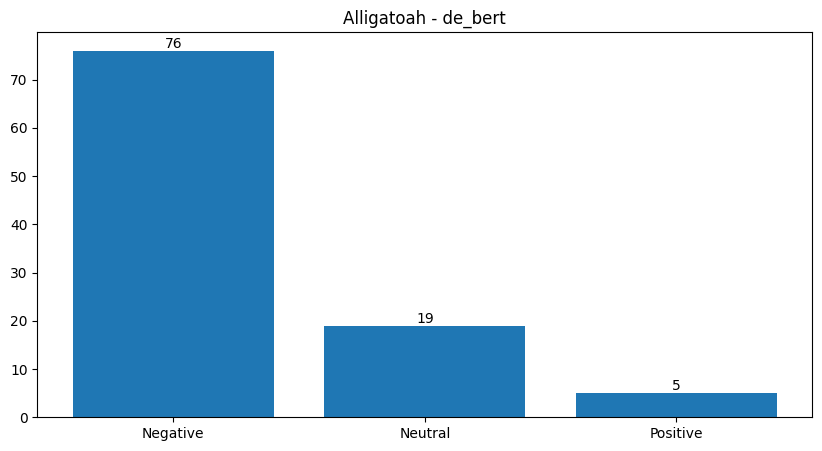

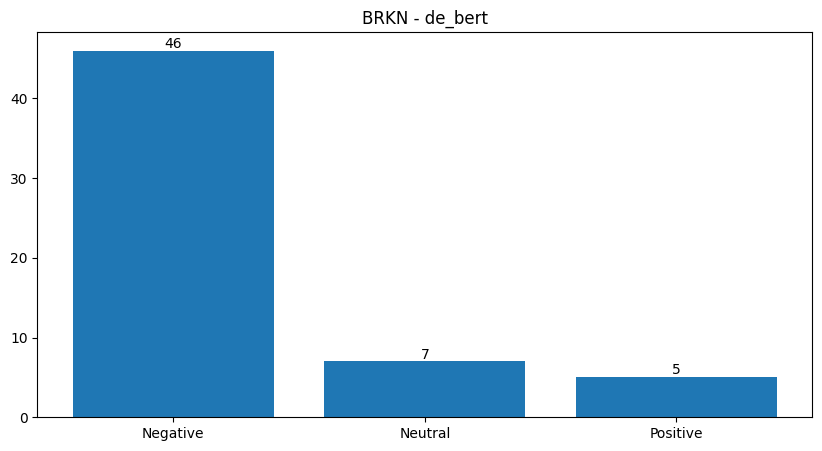

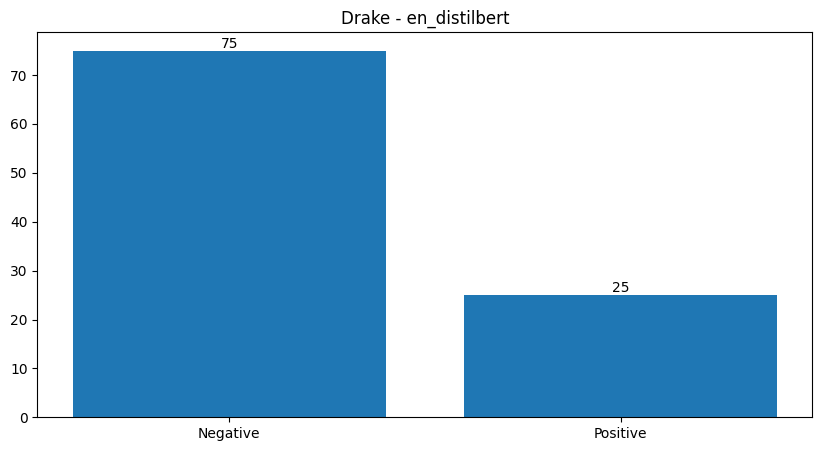

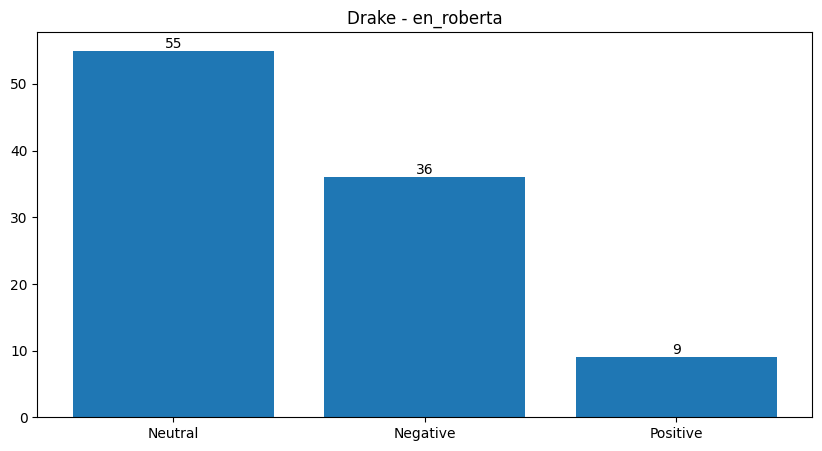

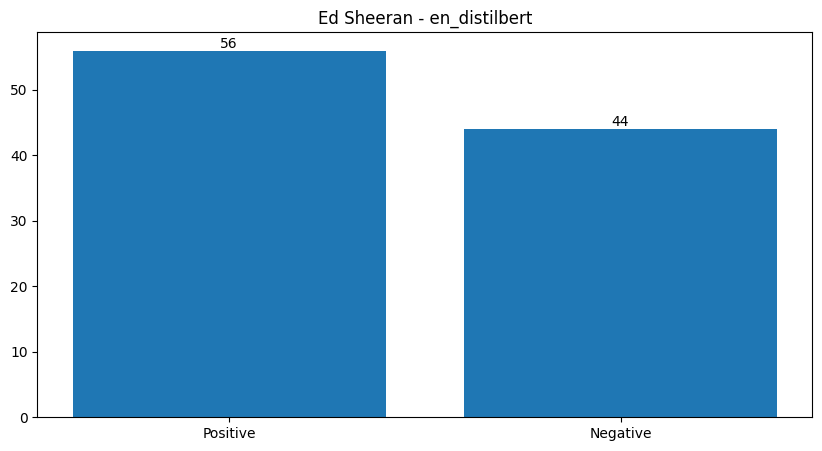

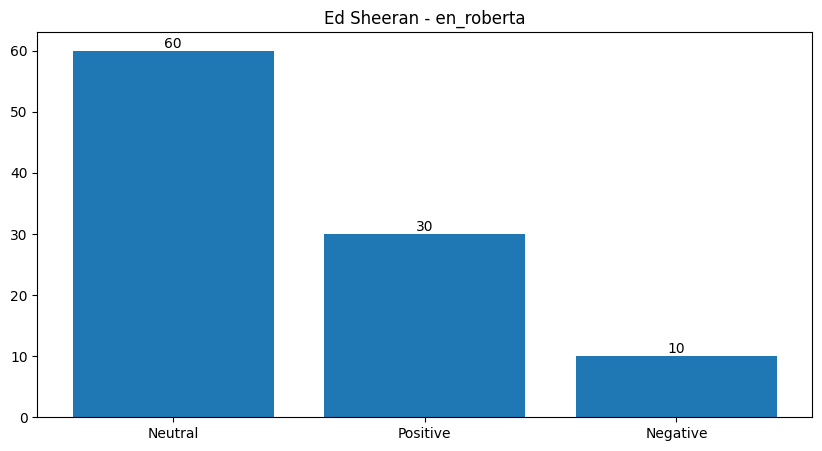

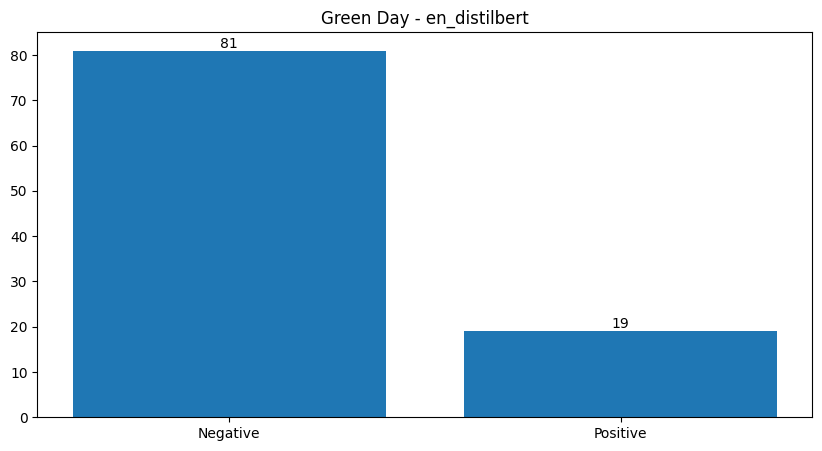

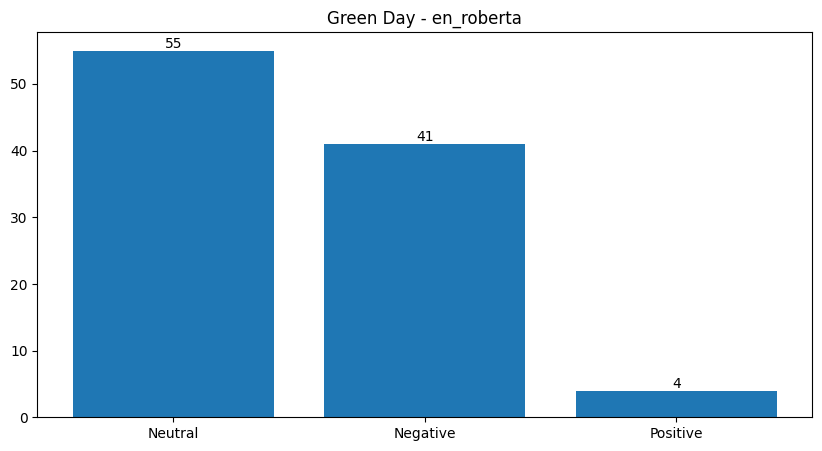

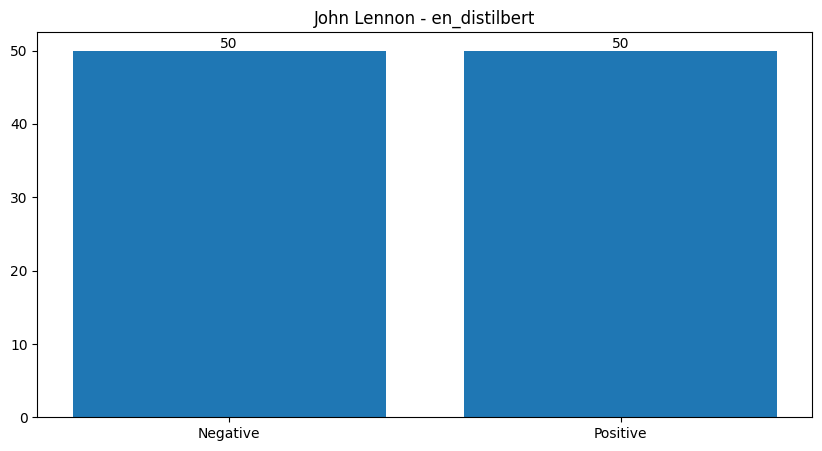

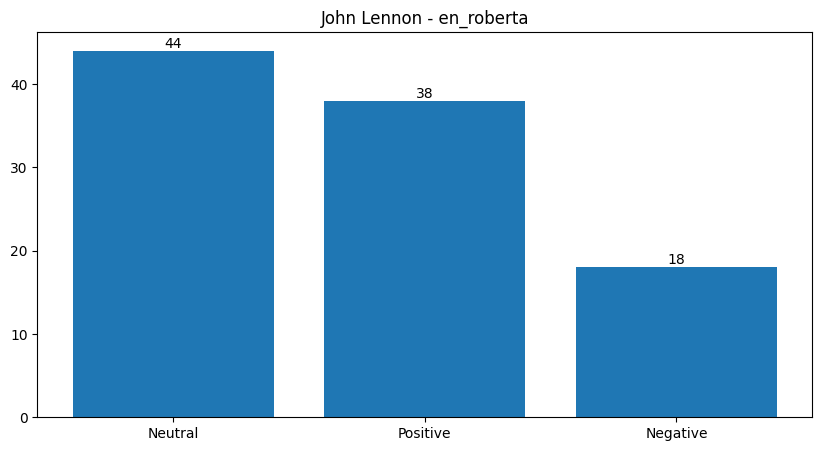

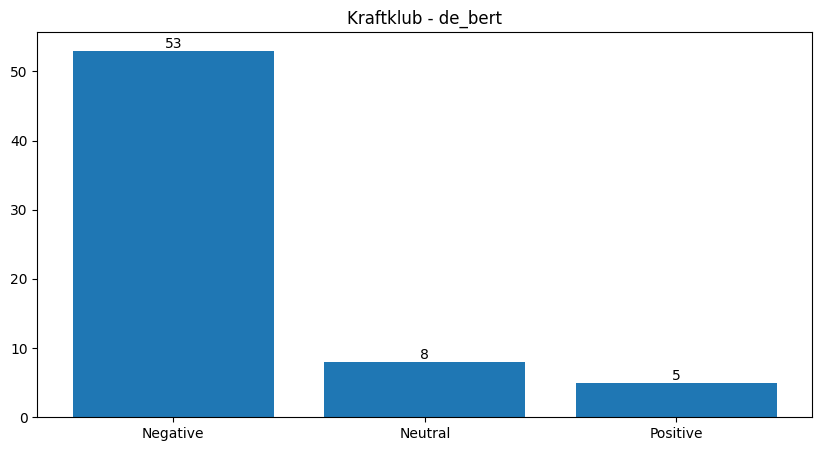

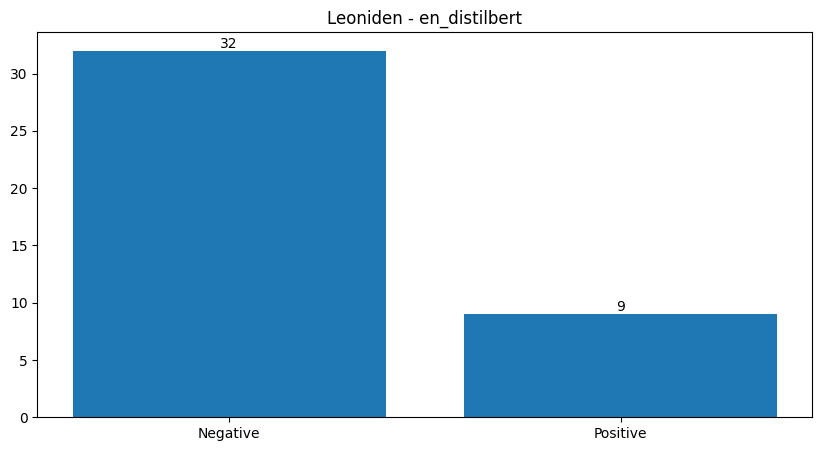

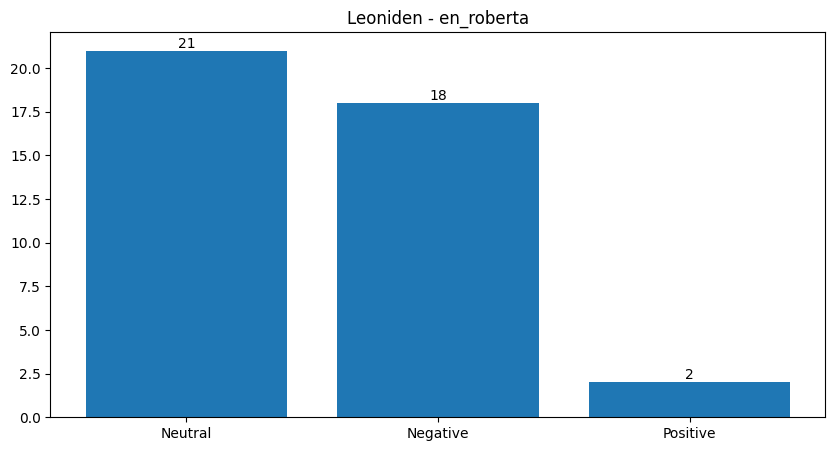

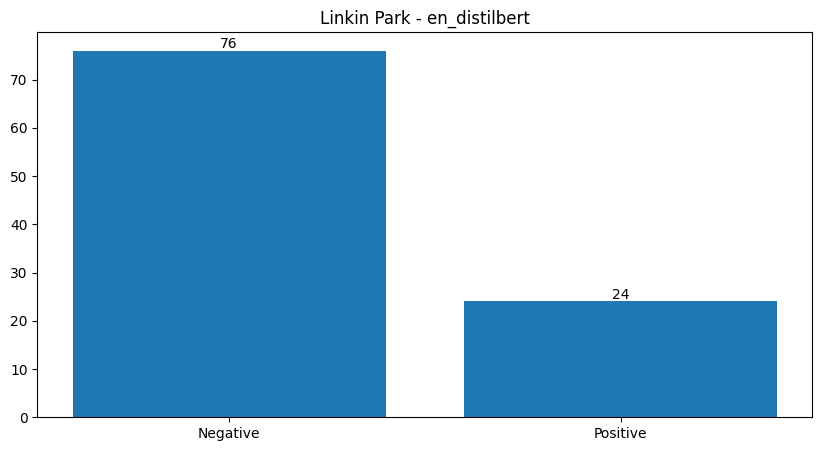

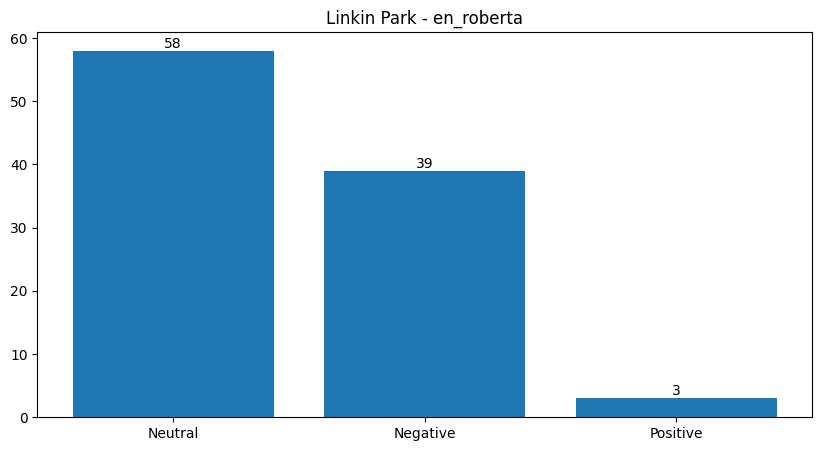

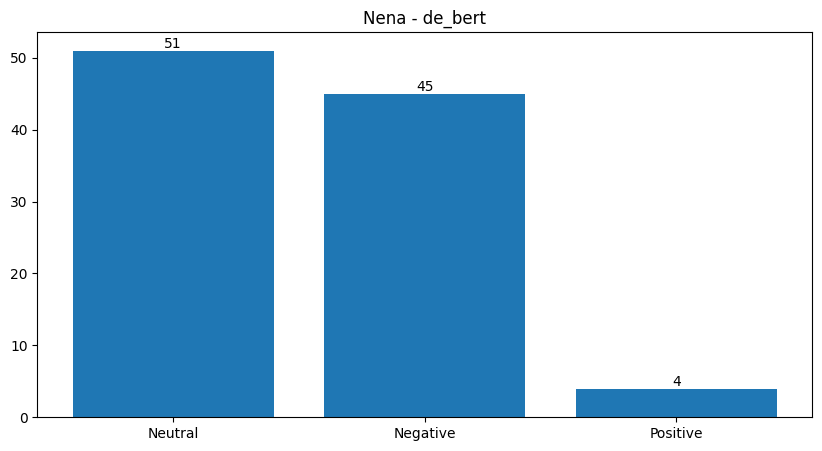

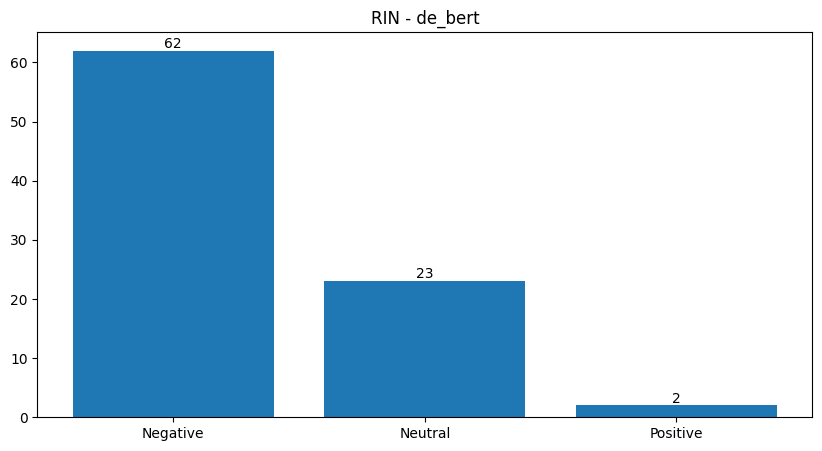

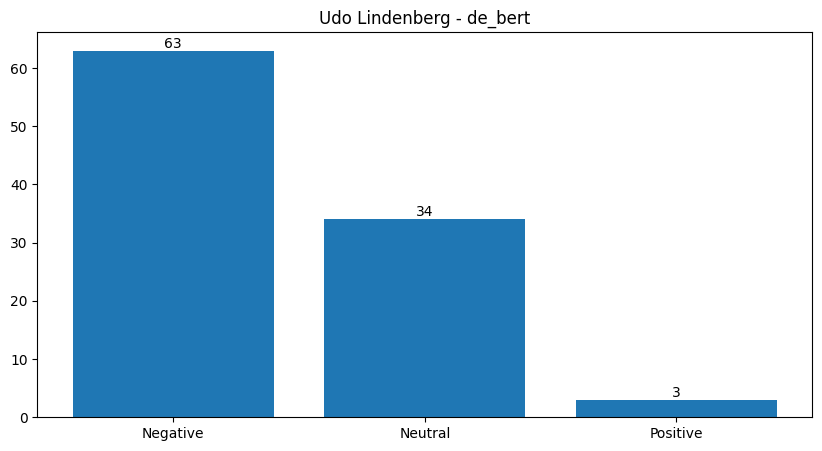

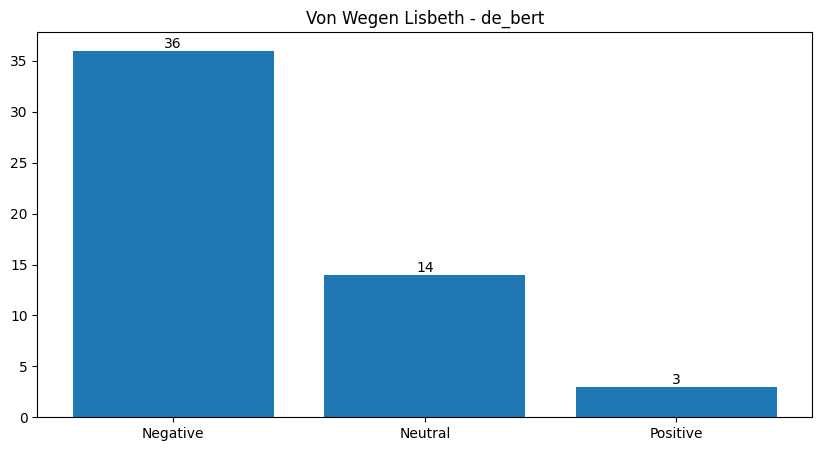

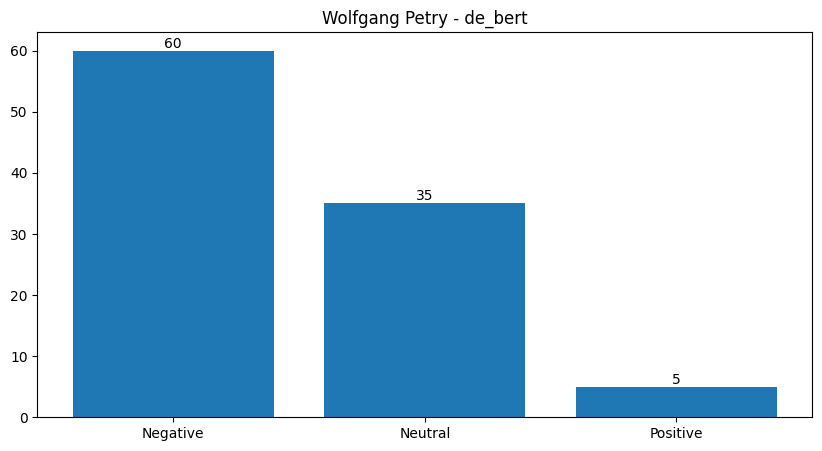

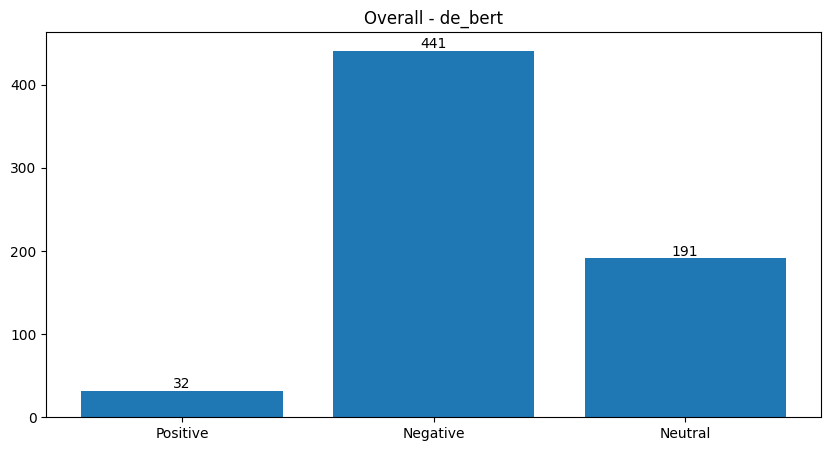

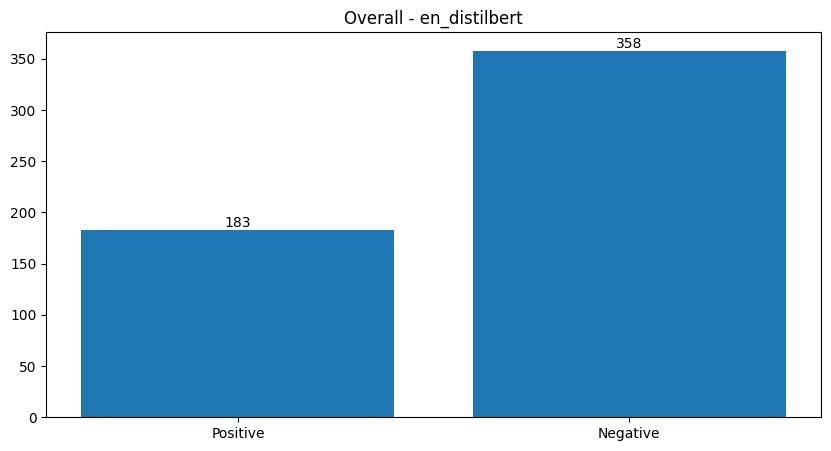

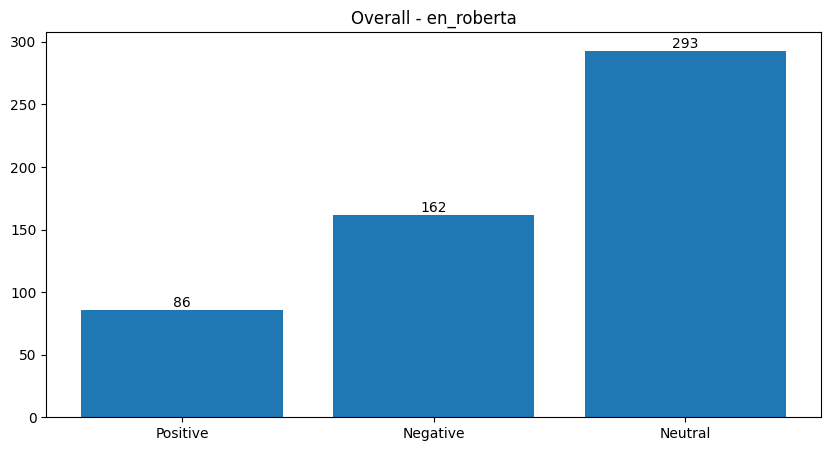

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

overall_labels_count_de_bert = {
    'Positive': 0,
    'Negative': 0,
    'Neutral': 0
}
overall_labels_count_en_distilbert = {
    'Positive': 0,
    'Negative': 0
}
overall_labels_count_en_roberta = {
    'Positive': 0,
    'Negative': 0,
    'Neutral': 0
}

for artist in data:

    artist_name = artist['artist']
    artist_language = artist['songs'][0]['language']

    labels_de_gbert = []
    labels_de_bert = []
    labels_en_distilbert = []
    labels_en_roberta = []

    for song in artist['songs']:
        if song['language'] == 'de':
            de_gbert = song['sentiment']['de_gbert']['label']
            labels_de_gbert.append(de_gbert)
            de_bert = song['sentiment']['de_bert']['label']
            labels_de_bert.append(de_bert)
        else:
            en_distilbert = song['sentiment']['en_distilbert']['label']
            labels_en_distilbert.append(en_distilbert)
            en_roberta = song['sentiment']['en_roberta']['label']
            labels_en_roberta.append(en_roberta)

    # Convert labels
    labels_de_gbert = convert_labels(labels_de_gbert, 'de_gbert')
    labels_de_bert = convert_labels(labels_de_bert, 'de_bert')
    labels_en_distilbert = convert_labels(labels_en_distilbert, 'en_distilbert')
    labels_en_roberta = convert_labels(labels_en_roberta, 'en_roberta')

    # Count same labels
    labels_de_gbert = pd.Series(labels_de_gbert)
    labels_de_bert = pd.Series(labels_de_bert)
    labels_en_distilbert = pd.Series(labels_en_distilbert)
    labels_en_roberta = pd.Series(labels_en_roberta)

    labels_de_gbert_count = labels_de_gbert.value_counts()
    labels_de_bert_count = labels_de_bert.value_counts()
    labels_en_distilbert_count = labels_en_distilbert.value_counts()
    labels_en_roberta_count = labels_en_roberta.value_counts()

    if artist_language == 'de':
        # Add to overall count
        overall_labels_count_de_bert['Positive'] += labels_de_bert_count['Positive']
        overall_labels_count_de_bert['Negative'] += labels_de_bert_count['Negative']
        overall_labels_count_de_bert['Neutral'] += labels_de_bert_count['Neutral']

        plt.figure(figsize=(10, 5))
        plt.title(f"{artist_name} - de_bert")
        # Same color for all labels
        plt.bar(labels_de_bert_count.index, labels_de_bert_count.values, color=['#1f77b4'])
        # Add bar labels
        for i, v in enumerate(labels_de_bert_count.values):
            plt.text(i, v, str(v), ha='center', va='bottom')
        plt.savefig(f"./../../data/output/sentiment_{artist_name}_de_bert.png")
        plt.show()
    else:
        # Add to overall count
        overall_labels_count_en_distilbert['Positive'] += labels_en_distilbert_count['Positive']
        overall_labels_count_en_distilbert['Negative'] += labels_en_distilbert_count['Negative']
        overall_labels_count_en_roberta['Positive'] += labels_en_roberta_count['Positive']
        overall_labels_count_en_roberta['Negative'] += labels_en_roberta_count['Negative']
        overall_labels_count_en_roberta['Neutral'] += labels_en_roberta_count['Neutral']


        plt.figure(figsize=(10, 5))
        plt.title(f"{artist_name} - en_distilbert")
        # Same color for all labels
        plt.bar(labels_en_distilbert_count.index, labels_en_distilbert_count.values, color=['#1f77b4'])
        # Add bar labels
        for i, v in enumerate(labels_en_distilbert_count.values):
            plt.text(i, v, str(v), ha='center', va='bottom')
        plt.savefig(f"./../../data/output/sentiment_{artist_name}_en_distilbert.png")
        plt.show()

        plt.figure(figsize=(10, 5))
        plt.title(f"{artist_name} - en_roberta")
        # Same color for all labels
        plt.bar(labels_en_roberta_count.index, labels_en_roberta_count.values, color=['#1f77b4'])
        # Add bar labels
        for i, v in enumerate(labels_en_roberta_count.values):
            plt.text(i, v, str(v), ha='center', va='bottom')
        plt.savefig(f"./../../data/output/sentiment_{artist_name}_en_roberta.png")
        plt.show()

# Plot overall_labels_count_de_bert
plt.figure(figsize=(10, 5))
plt.title(f"Overall - de_bert")
plt.bar(overall_labels_count_de_bert.keys(), overall_labels_count_de_bert.values(), color=['#1f77b4'])
for i, v in enumerate(overall_labels_count_de_bert.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.savefig(f"./../../data/output/sentiment_overall_de_bert.png")
plt.show()

# Plot overall_labels_count_en_distilbert
plt.figure(figsize=(10, 5))
plt.title(f"Overall - en_distilbert")
plt.bar(overall_labels_count_en_distilbert.keys(), overall_labels_count_en_distilbert.values(), color=['#1f77b4'])
for i, v in enumerate(overall_labels_count_en_distilbert.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.savefig(f"./../../data/output/sentiment_overall_en_distilbert.png")
plt.show()

# Plot overall_labels_count_en_roberta
plt.figure(figsize=(10, 5))
plt.title(f"Overall - en_roberta")
plt.bar(overall_labels_count_en_roberta.keys(), overall_labels_count_en_roberta.values(), color=['#1f77b4'])
for i, v in enumerate(overall_labels_count_en_roberta.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.savefig(f"./../../data/output/sentiment_overall_en_roberta.png")
plt.show()